<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## Bert Sentiment Analysis
[Ejemplo similar en Pytorch](https://colab.research.google.com/drive/1PHv-IRLPCtv7oTcIGbsgZHqrB5LPvB7S#scrollTo=m_mRflxPl32F)

In [1]:
!pip install transformers --quiet

In [2]:
import tensorflow
from transformers import TFBertModel

### Definiendo modelo

In [3]:
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [4]:
max_length = 140
output_shape = 5 #3

In [6]:
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [7]:
#model.summary()

In [8]:
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
    plt.show()

### Datos
Utilizaremos como dataset críticas de Google Apps en formato csv.

In [9]:
# Descargar la carpeta de dataset
!curl -L -o 'apps.csv' 'https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download&confirm=t'
!curl -L -o 'reviews.csv' 'https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download&confirm=t'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0  50732      0  0:00:02  0:00:02 --:--:--  119k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7002k  100 7002k    0     0  1879k      0  0:00:03  0:00:03 --:--:-- 3167k


In [10]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [11]:
print("Cantidad de críticas:", len(df))

Cantidad de críticas: 15746


<Axes: xlabel='score', ylabel='count'>

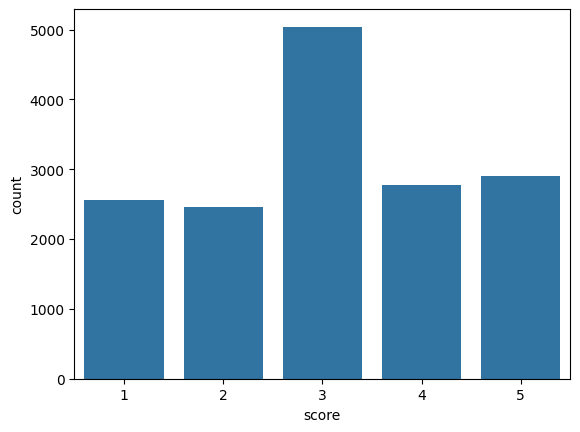

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# ¿Cómo están balanceados los datos?
sns.countplot(x=df.score)

## Limpieza de datos

In [13]:
# Balancear los datos para 3 clases
#df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
#class_names = ['negative', 'neutral', 'positive']

# Para 5 clases
# si no hacemos esto, lo de restar 1, output_shape es de 6.
df['sentiment'] = df['score'] - 1

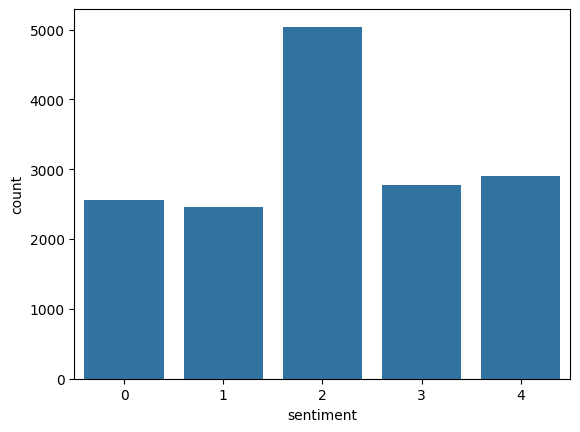

In [14]:
ax = sns.countplot(x=df.sentiment)

In [15]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

Median: 139.0


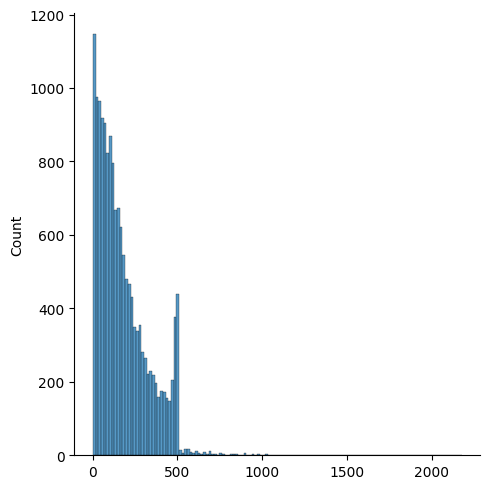

In [16]:
sentence_lens = []

for sentence in sentences:
  sentence_lens.append(len(sentence))

print("Median:", np.median(sentence_lens))
sns.displot(sentence_lens)

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:3])
output_shape = y.shape[1]
print("output shape:", output_shape)

y shape: (15746,)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
output shape: 5


## 1 - Data generator


In [19]:
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset
from transformers import BertTokenizer
import numpy as np

In [20]:
# Muy importante que para tensorflow los modelos Bert deben empezar con "TF"
# de lo contrario estaremos utilizando un modelo para pytorch

# Descargamos el modelo base de BERT más liviano y su correspondiente tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [21]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
from sklearn.model_selection import train_test_split
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

In [22]:
print(idx_train.shape[0], idx_val.shape[0], idx_test.shape[0])

10076 2520 3150


In [23]:

def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]

    return train_InputExamples, validation_InputExamples


def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]),
        ),
    )

In [24]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [25]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [26]:
X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [27]:
y_test = y[idx_test]

## 2 - BERT multiclass classification

In [ ]:
history1 = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
315/315 [==============================] - 142s 396ms/step - loss: 1.1244 - accuracy: 0.3878 - f1_score: 0.3826 - val_loss: 1.0006 - val_accuracy: 0.5365 - val_f1_score: 0.4952
Epoch 2/5
315/315 [==============================] - 124s 393ms/step - loss: 1.0336 - accuracy: 0.4686 - f1_score: 0.4602 - val_loss: 0.9804 - val_accuracy: 0.5397 - val_f1_score: 0.4414
Epoch 3/5
315/315 [==============================] - 124s 392ms/step - loss: 1.0027 - accuracy: 0.4954 - f1_score: 0.4846 - val_loss: 0.9472 - val_accuracy: 0.5369 - val_f1_score: 0.4489
Epoch 4/5
315/315 [==============================] - 124s 392ms/step - loss: 0.9714 - accuracy: 0.5196 - f1_score: 0.5085 - val_loss: 0.9260 - val_accuracy: 0.5524 - val_f1_score: 0.4709
Epoch 5/5
315/315 [==============================] - 124s 392ms/step - loss: 0.9598 - accuracy: 0.5230 - f1_score: 0.5124 - val_loss: 0.8998 - val_accuracy: 0.5627 - val_f1_score: 0.5243


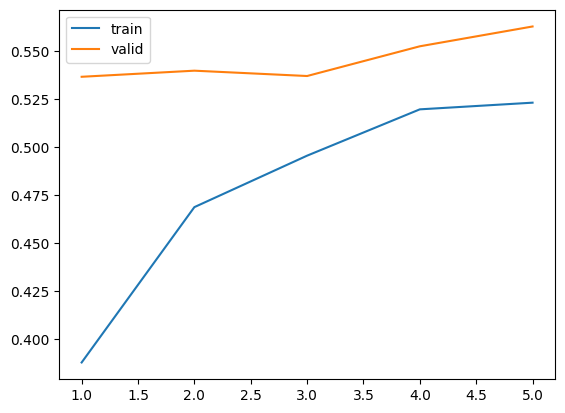

In [ ]:
plot_train_metrics(history1)

In [ ]:
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

99/99 [==============================] - 32s 293ms/step


array([[0.52204156, 0.30572265, 0.17223577],
       [0.4569324 , 0.27657405, 0.26649353],
       [0.22824809, 0.33422694, 0.437525  ]], dtype=float32)

In [ ]:
y_hat = np.argmax(y_hat_prob, axis=1)

In [ ]:
# Calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

99/99 [==============================] - 33s 296ms/step - loss: 0.9015 - accuracy: 0.5749 - f1_score: 0.5389


0.574920654296875

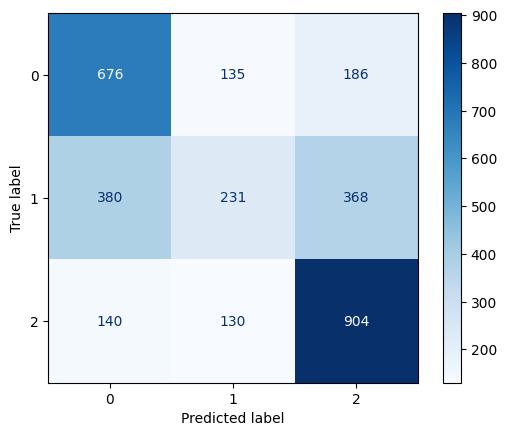

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generanmos la matriz de confusión
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)

# Imprimir información de depuración
# Verifica las clases únicas en y_test y y_hat
unique_classes_test = np.unique(y_test.argmax(axis=1))
unique_classes_hat = np.unique(y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=unique_classes_test)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

## 3 - BERT Fine tuning

In [ ]:
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model2 = model

# Colocar todas las layers como entrenables
for layer in model2.layers:
  layer.trainable = True

# Como es fine tunning se recomiendo utiliza al menos un learning rate 100 veces
# menor
model2.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

In [ ]:
history2 = model2.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
315/315 [==============================] - 357s 968ms/step - loss: 0.8282 - accuracy: 0.6099 - val_loss: 0.6852 - val_accuracy: 0.6968
Epoch 2/5
315/315 [==============================] - 300s 952ms/step - loss: 0.6400 - accuracy: 0.7232 - val_loss: 0.6897 - val_accuracy: 0.7036
Epoch 3/5
315/315 [==============================] - 300s 951ms/step - loss: 0.4992 - accuracy: 0.7929 - val_loss: 0.6458 - val_accuracy: 0.7567
Epoch 4/5
315/315 [==============================] - 300s 953ms/step - loss: 0.3632 - accuracy: 0.8603 - val_loss: 0.6428 - val_accuracy: 0.7829
Epoch 5/5
315/315 [==============================] - 300s 952ms/step - loss: 0.2488 - accuracy: 0.9044 - val_loss: 0.7336 - val_accuracy: 0.7921


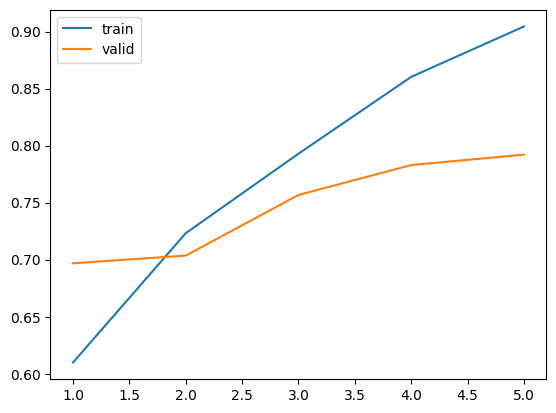

In [ ]:
plot_train_metrics(history2)

In [ ]:
y_hat_prob2 = model2.predict(X_test)
y_hat_prob2[:3]

99/99 [==============================] - 33s 308ms/step


array([[0.11642557, 0.7336583 , 0.1499162 ],
       [0.78516304, 0.20968762, 0.00514932],
       [0.02317205, 0.1998188 , 0.7770092 ]], dtype=float32)

In [ ]:
y_hat2 = np.argmax(y_hat_prob2, axis=1)

In [ ]:
# Calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

99/99 [==============================] - 34s 317ms/step - loss: 0.6923 - accuracy: 0.7959


0.7958729863166809

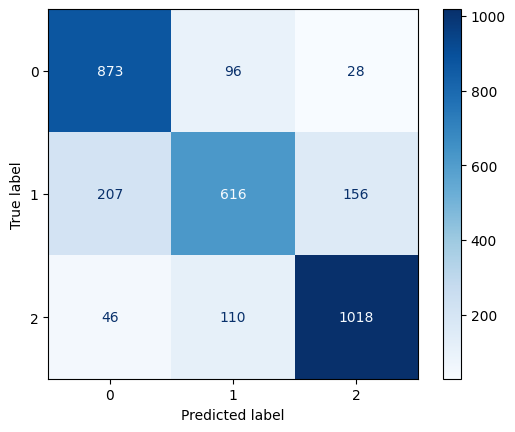

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generanmos la matriz de confusión
cm = confusion_matrix(y_test.argmax(axis=1), y_hat2)

# Imprimir información de depuración
# Verifica las clases únicas en y_test y y_hat
unique_classes_test = np.unique(y_test.argmax(axis=1))
unique_classes_hat = np.unique(y_hat2)
cmd = ConfusionMatrixDisplay(cm, display_labels=unique_classes_test)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

## Salvar el modelo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model2.save_weights('/content/drive/MyDrive/bert_weights.h5')

In [ ]:
# Descargar los pesos a nuestra PC
# Solo es necesario si se desea repetir el uso de este modelo en el futuro
from google.colab import files
files.download('/content/drive/MyDrive/bert_weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Levantar el modelo

In [ ]:
bert_model3 = TFBertModel.from_pretrained("bert-base-uncased")

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')

# attention_mask - is a binary mask which tells BERT which tokens to attend and which not to attend.
# Encoder will add the 0 tokens to the some sequence which smaller than MAX_SEQUENCE_LENGTH,
# and attention_mask, in this case, tells BERT where is the token from the original data and where is 0 pad token:
attention_mask = tensorflow.keras.layers.Input((max_length,), dtype=tensorflow.int32, name='attention_mask')

# Get the pooled_output (embedding que representa toda la entrada)
output = bert_model3([input_ids, attention_mask])[1]

# We can also add dropout as regularization technique:
output = tensorflow.keras.layers.Dropout(rate=0.2)(output)

# Se puede agregar más capas Densas en el medio si se desea

# Provide number of classes to the final layer:
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(output)

# Final model:
model3 = tensorflow.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)

In [ ]:
model3.load_weights('bert_weights.h5')

## Ensayo

In [ ]:
text = "I love this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids'])
print("Attention mask:", tf_batch['attention_mask'])

Inputs ids: tf.Tensor(
[[  101  1045  2293  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

c:\Users\franco\OneDrive\Escritorio\ESPECIALIZACIO_EN_INTELIGENCIA_ARTIFICIAL\procesamiento_lenguaje_natural\nlp\lib\site-packages\transformers\tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
X_ensayo = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [ ]:
y_prob_ensayo = model3.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)
print("Clasificación:", class_names[int(y_prob)])

1/1 [==============================] - 4s 4s/step
Clasificación: positive


C:\Users\franco\AppData\Local\Temp\ipykernel_13176\2431970867.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Clasificación:", class_names[int(y_prob)])


## 4 - Agregamos una capa densa antes de la salida

In [ ]:
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)

# Agregamos mas capas densas
dense_1_output = tensorflow.keras.layers.Dense(100, activation='softmax')(x)
dense_2_output = tensorflow.keras.layers.Dense(50, activation='softmax')(dense_1_output)

output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(dense_2_output)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [28]:
history4 = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
315/315 [==============================] - 150s 424ms/step - loss: 1.0974 - accuracy: 0.3549 - f1_score: 0.2405 - val_loss: 1.0984 - val_accuracy: 0.3480 - val_f1_score: 0.1721
Epoch 2/5
315/315 [==============================] - 129s 410ms/step - loss: 1.0964 - accuracy: 0.3598 - f1_score: 0.1764 - val_loss: 1.0964 - val_accuracy: 0.3480 - val_f1_score: 0.1721
Epoch 3/5
315/315 [==============================] - 129s 408ms/step - loss: 1.0892 - accuracy: 0.3658 - f1_score: 0.1922 - val_loss: 1.0774 - val_accuracy: 0.5044 - val_f1_score: 0.3963
Epoch 4/5
315/315 [==============================] - 146s 463ms/step - loss: 1.0544 - accuracy: 0.4877 - f1_score: 0.3850 - val_loss: 1.0146 - val_accuracy: 0.5349 - val_f1_score: 0.4266
Epoch 5/5
315/315 [==============================] - 129s 411ms/step - loss: 0.9967 - accuracy: 0.5115 - f1_score: 0.4183 - val_loss: 0.9498 - val_accuracy: 0.5484 - val_f1_score: 0.4555


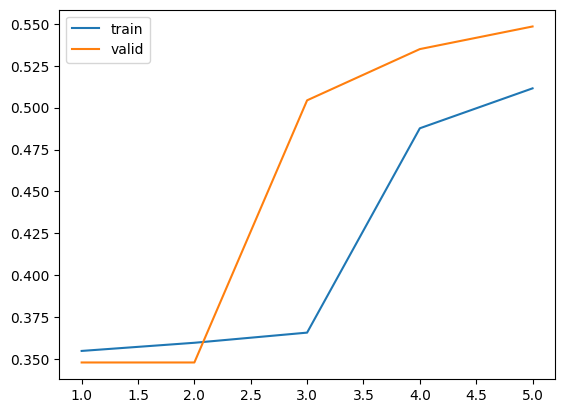

In [29]:
plot_train_metrics(history4)

In [30]:
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

99/99 [==============================] - 34s 308ms/step


array([[0.46047068, 0.34881404, 0.19071533],
       [0.44041687, 0.35052493, 0.20905817],
       [0.32550225, 0.34286293, 0.33163476]], dtype=float32)

In [31]:
y_hat = np.argmax(y_hat_prob, axis=1)

In [32]:
# Calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

99/99 [==============================] - 34s 312ms/step - loss: 0.9505 - accuracy: 0.5543 - f1_score: 0.4688


0.5542857050895691

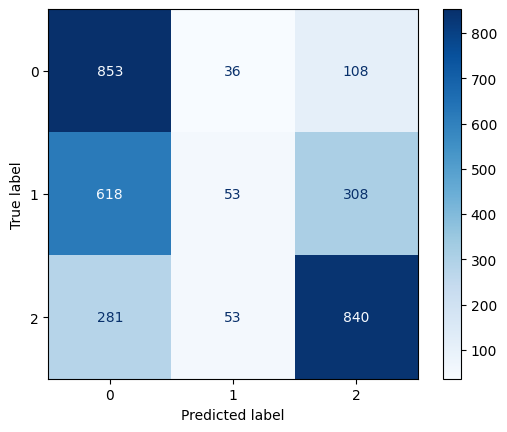

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generanmos la matriz de confusión
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)

# Imprimir información de depuración
# Verifica las clases únicas en y_test y y_hat
unique_classes_test = np.unique(y_test.argmax(axis=1))
unique_classes_hat = np.unique(y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=unique_classes_test)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

## 5 - Además de agregar capas densas vamos a usar 5 clases en vez de 3

In [ ]:
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)

# Agregamos mas capas densas
dense_1_output = tensorflow.keras.layers.Dense(100, activation='softmax')(x)
dense_2_output = tensorflow.keras.layers.Dense(50, activation='softmax')(dense_1_output)

output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(dense_2_output)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [31]:
history5 = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
315/315 [==============================] - 127s 405ms/step - loss: 1.6007 - accuracy: 0.3234 - f1_score: 0.0978 - val_loss: 1.6002 - val_accuracy: 0.3190 - val_f1_score: 0.0968
Epoch 2/5
315/315 [==============================] - 126s 402ms/step - loss: 1.5997 - accuracy: 0.3234 - f1_score: 0.0978 - val_loss: 1.5993 - val_accuracy: 0.3190 - val_f1_score: 0.0968
Epoch 3/5
315/315 [==============================] - 128s 407ms/step - loss: 1.5988 - accuracy: 0.3234 - f1_score: 0.0978 - val_loss: 1.5985 - val_accuracy: 0.3190 - val_f1_score: 0.0968
Epoch 4/5
315/315 [==============================] - 128s 407ms/step - loss: 1.5979 - accuracy: 0.3234 - f1_score: 0.0978 - val_loss: 1.5977 - val_accuracy: 0.3190 - val_f1_score: 0.0968
Epoch 5/5
315/315 [==============================] - 128s 407ms/step - loss: 1.5970 - accuracy: 0.3234 - f1_score: 0.0978 - val_loss: 1.5969 - val_accuracy: 0.3190 - val_f1_score: 0.0968


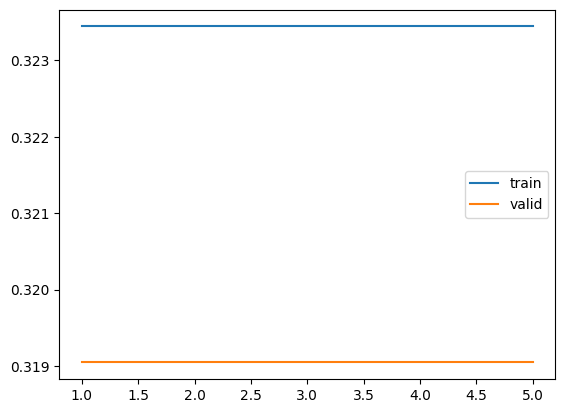

In [32]:
plot_train_metrics(history5)

In [33]:
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

99/99 [==============================] - 30s 305ms/step


array([[0.1931063 , 0.19246615, 0.2176944 , 0.19504446, 0.20168874],
       [0.19309567, 0.19247334, 0.21770705, 0.19504245, 0.20168148],
       [0.19308373, 0.19246419, 0.21769892, 0.19506878, 0.20168434]],
      dtype=float32)

In [34]:
y_hat = np.argmax(y_hat_prob, axis=1)

In [35]:
# Calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

99/99 [==============================] - 35s 317ms/step - loss: 1.5978 - accuracy: 0.3108 - f1_score: 0.0948


0.3107936382293701

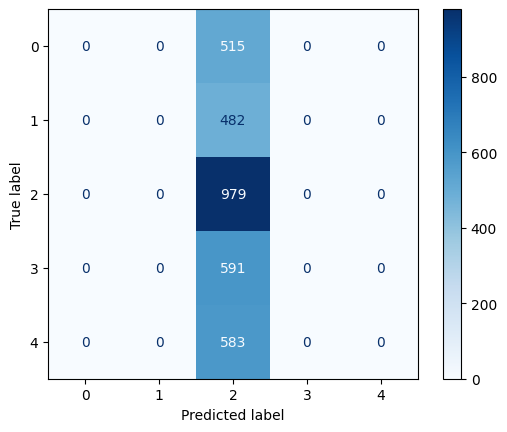

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generanmos la matriz de confusión
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)

# Imprimir información de depuración
# Verifica las clases únicas en y_test y y_hat
unique_classes_test = np.unique(y_test.argmax(axis=1))
unique_classes_hat = np.unique(y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=unique_classes_test)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

No encuentro porque no se entrena el modelo con 5 clases.

## Conclusiones

Se puede apreciar que luego de realizar el fine tuning el modelo se ajusta mucho mejor al problema. Existen diferentes formas de llevar a cabo este proceso, es importante que el learning rate sea mucho menor.\
Existen optimizadores pensados para fine tuning que realizan el ajuste de learning rate adaptativo a medida que se va entrenando capas más profundas del modelo.  
Agregar mas capas densas no mejoro demasiado.  
El modelo para la clasificación con 5 clases parece no estar aprendiendo.